  ## Follow example of Machinelearningmastery.com
    
Here i follow step by step the implementation of deep learning w/ Keras for sentymen analysis to better understand the tools.

Small modifications will be needed in order to implement it to Cajamar problem.

Sources: http://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

Problem desc: The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.

**Description of the data set:** The keras.datasets.imdb.load_data() allows you to load the dataset in a format that is ready for use in neural network and deep learning models.

The words have been replaced by integers that indicate the absolute popularity of the word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

That is, every word has associated a unique integer. 1=most popular word, 9999..= least popular word. Or al reves.

In [72]:
import numpy as np
from keras import preprocessing
from keras.datasets import imdb
from matplotlib import pyplot

In [ ]:
#Load the Data Set
(X_train, y_train), (X_test, y_test)= imdb.load_data()

In [17]:
print X_train.shape
print type(X_train[0])
for i in range(5):
    print len(X_train[i])


(25000,)
<type 'list'>
218
189
141
550
147


Vemos que es un array multidemiensional con 25K entradas (cada entrada es una review). Cada entrada es una lista de longitud variable, lista de palabras representadas por su correspondiente int.

In [30]:
print y_train.shape
print type(y)
print type(y[0])

for i in range(5):
    print y[i]

(25000,)
<type 'numpy.ndarray'>
<type 'numpy.int64'>
1
0
0
1
0


Vemos que las y son las labels. Tenemos 25K labels del train, una para cada review. En cada entrada tenemos un numero binario, indica si la review es positiva o negativa

In [21]:

X=np.concatenate((X_train, X_test), axis=0)
y=np.concatenate((y_train, y_test), axis=0)

In [22]:
#our data
print X.shape
print y.shape

(50000,)
(50000,)


In [31]:
#Summarize number of classes.
print 'Classes: '
print np.unique(y)
type(np.unique(y))

Classes: 
[0 1]


numpy.ndarray

We see that y is a binary array with only two types of entries. 1 or 0. One indicating positive review, the other indicating negative.

In [41]:
#Summarize number of words. 
#Get an idea of how many diferent words are on the data set

print 'Number of words: ' , len(np.unique(np.hstack(X))) #hstack stacks (unstacks) horizontally

Number of words:  88585


In [35]:
L=np.hstack(X)
print X.shape
print L.shape
print type(X[0])
print type(L)

(50000,)
(11737946,)
<type 'list'>
<type 'numpy.ndarray'>


In [46]:
#Get an idea of the average review length
print 'Review lenght: '
print len(np.hstack(X))/float(len(X))

Review lenght: 
234.75892


Review lenght:
Mean:  234.75892  words,  std:  172.911494587


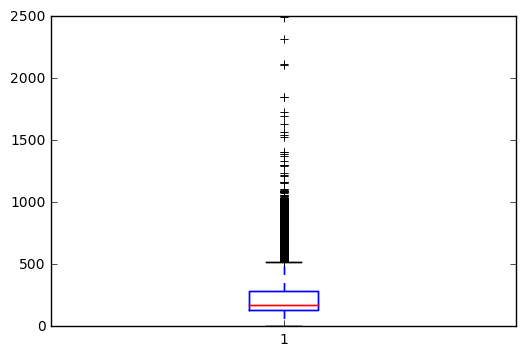

In [57]:
#Summarize review lenght. HIS CODE:

print 'Review lenght:'
result= map(len, X) #Returns a list of the results aplying len to the arguments of the sequence
print 'Mean: ', np.mean(result), ' words,  std: ', np.std(result)
pyplot.boxplot(result)
pyplot.show()

We have seen that the median is 234 words per reviews with a std of 170 words. Looking at the box plot it is clear that we can get most of the reviews whole with a clipped lenght of 400-500 words

<font color='purple'> Note: Box and whisker plots. What are they. </font>

From docstring: Make a box and whisker plot for each column of ``x`` or each vector in sequence ``x``.  The box extends from the lower to
upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the
data.  Flier points are those past the end of the whiskers.

**From WIKI:**

Box and whisker plots are uniform in their use of the box: **the bottom and top of the box are always the first and third quartiles, and the band inside the box is always the second quartile (the median).** But the ends of the whiskers can represent several possible alternative values, among them:

- the minimum and maximum of all of the data[1] (as in figure 2)

- the lowest datum still within 1.5 IQR of the lower quartile, and the highest datum still within 1.5 IQR of the upper quartile (often called the Tukey boxplot)[2][3] (as in figure 3)

- one standard deviation above and below the mean of the data

- the 9th percentile and the 91st percentile
- the 2nd percentile and the 98th percentile.

Any data not included between the whiskers should be plotted as an outlier with a dot, small circle, or star, but occasionally this is not done.
 <font color='red'> So if i get this correctly 50% of the data is inside the box, the whiskers extend to default = 1.5, 3QR+ 1.5*IQR no idea what this is </font> 

**Word embeddings**
Techniche for natural language processing where words are assigned a positive integer, and a vector in a N dimensional vector space. The embedding layer works its magic and similarty between words is represented as closedness in the vector space, metric is probably the euclidian, (necessarly?)

Our problem:

**Embedding layer.**
Maps every word (integer) to a N-dimensional vector space.

We will only be interested in the first 5,000 most common words (vocabulary size). The output dimension will be 32, we will use a 32 dimension vector to represent each word. We cap the lenght of the review at 500 words.

We will start by developing a multi-layer perceptron model with a single hidden layer

In [81]:
#MLP for the IMBD problem
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
#fix random seed for ?? reproducibility
seed = 7
np.random.seed(seed)

In [99]:
#Load dataset with only 5K most common words
topwords=5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=topwords) 

We shall fix review lenght at 500, truncating longer ones and and 0-padding shorter ones.

In [100]:
#Cut the sequences into maximum fixed lenght of 500
max_words=500
X_train= sequence.pad_sequences(X_train, maxlen=max_words)#Afegeix 0 al principi o trunca fins a arribar a 500
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Now we can create our model. We will use an Embedding layer as the input layer, setting the vocabulary to 5,000, the word vector size to 32 dimensions and the input_length to 500. The output of this first layer will be a 32×500 sized matrix as discussed in the previous section.

We will flatten the Embedded layers output to one dimension, then use one dense hidden layer of 250 units with a rectifier activation function. The output layer has one neuron and will use a sigmoid activation to output values of 0 and 1 as predictions.

The model uses logarithmic loss and is optimized using the efficient ADAM optimization procedure.

<font color = red> Lmao what </font>

In [102]:
#Create model.
model= Sequential()
model.add(Embedding(topwords, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, 500, 32)       160000      embedding_input_1[0][0]          
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 16000)         0           embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 250)           4000250     flatten_1[0][0]                  
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1)             251         dense_1[0][0]                    
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_______________

We fit the model and use the test as validation while training. This model overfits quickly, (why?) we will only use 2 training epochs. Batch size of 128 since there is a lot of data. We avaluate accuracy on the test dataset.

**Epoch:** number of iterations that the training process goes trough the dataset.

**Batch size:** Number of instances that are evaluated before a weight update in the network is performed. <font color=red> Still not getting it </font>

In [108]:
#Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=2, batch_size=128, verbose=1)
#Final evaluation ?? but we trained with the test. What the hell
scores= model.evaluate(X_test, y_test, verbose=0)
print 'Accuracy: %.2f% %' % scores[1]

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 32s - loss: 0.0734 - acc: 0.9786 - val_loss: 0.3771 - val_acc: 0.8667
Epoch 2/2
25000/25000 [==============================] - 30s - loss: 0.0142 - acc: 0.9980 - val_loss: 0.4652 - val_acc: 0.8672
Accuracy: 0.87%


In [107]:
print 'Accuracy: ', scores[1]*100, '%'

Accuracy:  87.412 %
